# Context-Driven Tree-Structured RAG: Enhancing Retrieval Depth through Hierarchical Query Decomposition





The Context-Driven Tree-Structured Retrieval-Augmented Generation (RAG) approach is designed to decompose complex queries into hierarchical sub-queries, significantly enhancing the depth of retrieval. This framework operates in two main stages: a top-down exploration of query facets to create a tree of retrieved passages, followed by a bottom-up synthesis that integrates summarized information to produce a coherent long-form response. By structuring the retrieval process in this way, the framework reduces gaps in information and improves the quality of generated content.



## Key Features of Context-Driven Tree-Structured RAG



- **Hierarchical Query Decomposition**: The system breaks down complex queries into smaller, manageable sub-queries that can be addressed individually, allowing for more focused retrieval efforts.

- **Top-Down Exploration**: In the first stage, the model explores different facets of the query from a high-level perspective, retrieving relevant passages that form a tree structure based on their relationships to the main query.

- **Bottom-Up Synthesis**: The second stage involves synthesizing information from the retrieved passages. Summarized data from each node in the tree is integrated to generate a coherent and contextually rich final response.

- **Enhanced Retrieval Depth**: By structuring the retrieval process hierarchically, this approach allows for deeper exploration of topics and ensures that nuanced aspects of complex queries are addressed.



## How Context-Driven Tree-Structured RAG Works



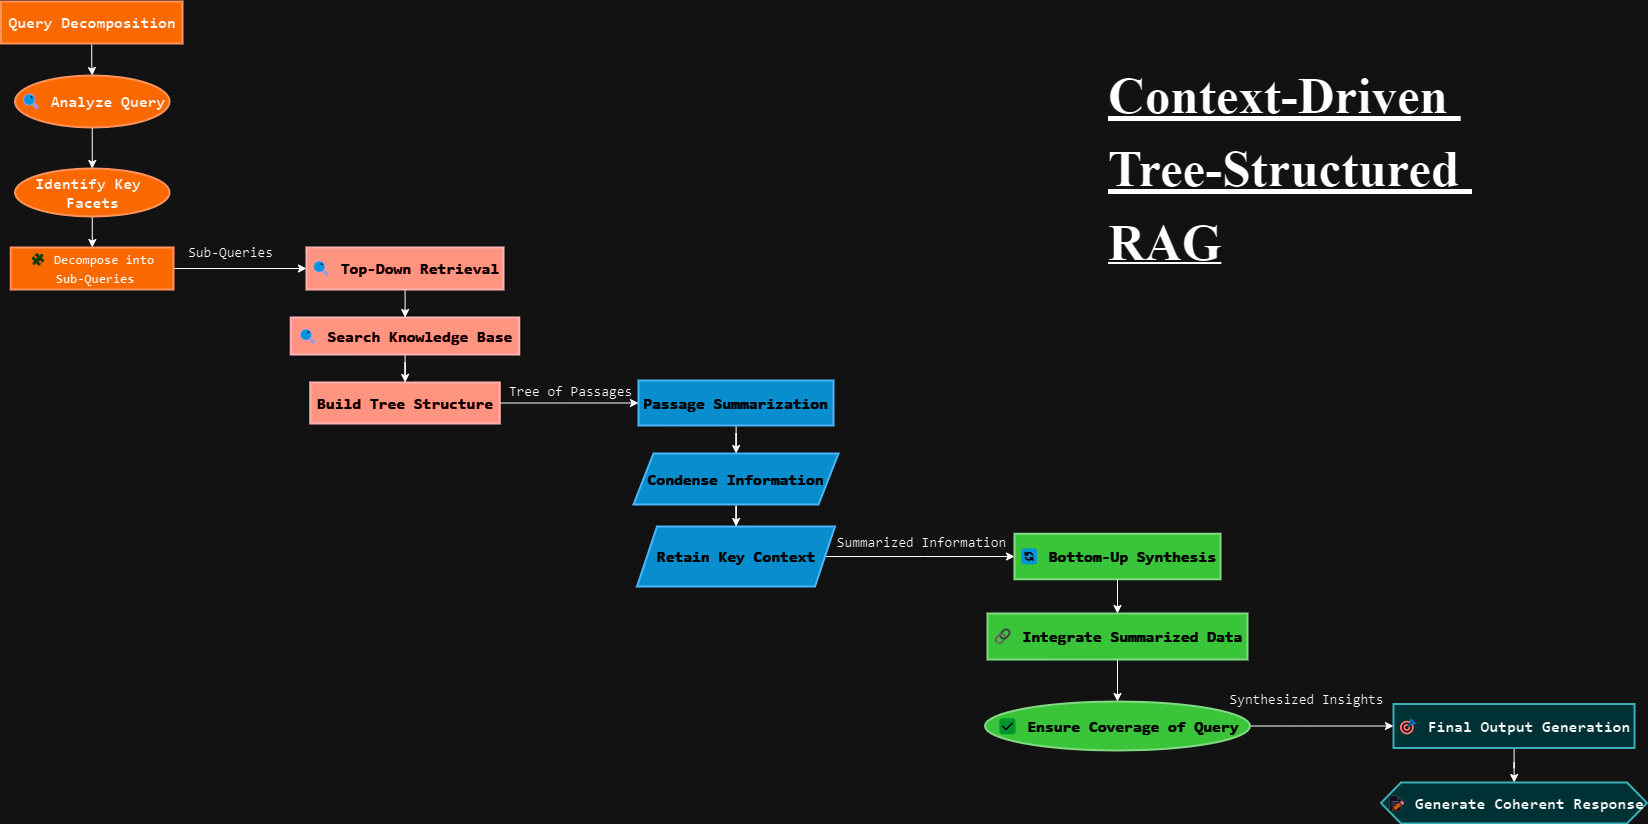

1. **Query Decomposition**:
   - When a complex query is received, it is analyzed to identify its key facets.
   - The system decomposes the query into hierarchical sub-queries that reflect these facets.

2. **Top-Down Retrieval**:
   - The model retrieves relevant passages for each sub-query through a top-down exploration.
   - Each retrieved passage forms a node in a tree structure, representing its relationship to the main query and other nodes.

3. **Passage Summarization**:
   - Retrieved passages are summarized at each node level to condense information while retaining essential context.
   - This summarization helps manage information overload by focusing on key insights from each passage.

4. **Bottom-Up Synthesis**:
   - In this stage, the system integrates summarized information from all nodes to construct a coherent response.
   - The synthesis process ensures that all relevant aspects of the original query are covered in the final output.

5. **Final Output Generation**:
   - The model generates a long-form response based on the synthesized information, ensuring clarity and coherence.
   - This output is then presented to the user, providing comprehensive answers to their complex queries.



In [ ]:
!pip install pypdf2 groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 7.7 MB/s eta 0:00:00


In [ ]:
import os
import requests
from PyPDF2 import PdfReader
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from groq import Groq

Number of segments created: 54

--- Final Response ---

Here is a synthesized response that combines the summaries:

BERT (Bidirectional Encoder Representations from Transformers) is a new language representation model that uses deep bidirectional representations from unlabeled text to achieve state-of-the-art results on various natural language processing tasks. Unlike previous models, BERT jointly conditions on both left and right context in all layers, making it possible to fine-tune the model with just one additional output layer to achieve impressive results. BERT has achieved new state-of-the-art results on eleven tasks, including a significant improvement on the GLUE score and MultiNLI accuracy.

The E benchmark includes three datasets: MNLI, QQP, and QNLI, which require predicting whether a second sentence is an entailment, contradiction, or neutral with respect to the first sentence, whether two questions are equivalent, or whether a given sentence contains the correct answer 

In [ ]:
# Step 0: Initialize the Groq Client
client = Groq(api_key="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")

In [ ]:
# Step 1: Load PDF and Extract Text
pdf_url = "https://arxiv.org/pdf/1810.04805.pdf"
pdf_path = "BERT_paper.pdf"

In [ ]:
response = requests.get(pdf_url)
with open(pdf_path, 'wb') as pdf_file:
    pdf_file.write(response.content)

In [ ]:
reader = PdfReader(pdf_path)
text = "".join(page.extract_text() for page in reader.pages)

In [ ]:
# Step 2: Divide Text into Segments
segment_size = 1200
segments = [text[i:i + segment_size] for i in range(0, len(text), segment_size)]
print(f"Number of segments created: {len(segments)}")

Number of segments created: 54


In [ ]:
# Step 3: Convert Segments into Semantic Embeddings
vectorizer = TfidfVectorizer()
segment_embeddings = vectorizer.fit_transform(segments)

In [ ]:
# Step 4: Query Decomposition
query = "What is  Natural Language Inference?"

In [ ]:
query_embedding = vectorizer.transform([query])
similarities = cosine_similarity(query_embedding, segment_embeddings).flatten()

In [ ]:
# Identify top-k relevant segments
top_k = 5  # For tree structure, use more segments
top_indices = similarities.argsort()[-top_k:][::-1]
top_segments = [segments[i] for i in top_indices]

In [ ]:
# Step 5: Top-Down Passage Retrieval
tree_nodes = []
for idx, segment in enumerate(top_segments):
    tree_nodes.append({"level": 1, "node_id": idx + 1, "content": segment})

In [ ]:
# Step 6: Passage Summarization
summaries = []
for node in tree_nodes:
    try:
        summary_response = client.chat.completions.create(
            messages=[
                {"role": "system", "content": "You are a summarization assistant."},
                {"role": "user", "content": f"Summarize the following text:\n\n{node['content']}"},
            ],
            model="llama3-8b-8192",
        )
        node_summary = summary_response.choices[0].message.content
        summaries.append({"node_id": node["node_id"], "summary": node_summary})
    except Exception as e:
        print(f"Error during summarization for node {node['node_id']}: {e}")

In [ ]:
# Step 7: Bottom-Up Synthesis
final_response = ""
try:
    synthesis_input = "\n".join([f"Node {s['node_id']}: {s['summary']}" for s in summaries])
    synthesis_response = client.chat.completions.create(
        messages=[
            {"role": "system", "content": "You are a synthesis assistant."},
            {"role": "user", "content": f"Combine the following summaries into a coherent response:\n\n{synthesis_input}"},
        ],
        model="llama3-8b-8192",
    )
    final_response = synthesis_response.choices[0].message.content
except Exception as e:
    print(f"Error during synthesis: {e}")

In [ ]:
# Step 8: Final Output Generation
if final_response:
    print("\n--- Final Response ---\n")
    print(final_response)
else:
    print("No final response generated.")


--- Final Response ---

The article discusses the significance of language model pre-training for improving natural language processing tasks. Specifically, it presents the concept of BERT (Bidirectional Encoder Representations from Transformers), a language representation model that combines both left and right context to generate deep bidirectional representations from unlabeled text. BERT can be fine-tuned with just one additional output layer to achieve state-of-the-art results on various tasks, including question answering and language inference, without significant architecture modifications.

The article also highlights the effectiveness of BERT in several datasets, including MNLI, QQP, and QNLI. For instance, BERT achieved a significant improvement of 93.2% absolute improvement in the General Language Understanding Evaluation (GLUE) test and 83.1% absolute improvement in the Stanford Question Answering Dataset (SQuAD) v2.0 test.

Furthermore, the article discusses the applicat

## Workflow Explained

### Step 0: Initialize the Groq Client
The Groq client is set up with the provided API key, enabling interaction with advanced language models.

### Step 1: Load PDF and Extract Text
The specified PDF (BERT paper) is downloaded and read. The text is extracted from all pages and stored as a single string.

### Step 2: Segment the Text
The extracted text is divided into 1200-character segments. This segmentation is crucial for managing long-form text efficiently.

### Step 3: Generate Embeddings for Segments
TF-IDF is used to create embeddings for all text segments. These embeddings facilitate similarity-based retrieval.

### Step 4: Query Decomposition
The user query is embedded, and cosine similarity is computed with each segment. Top 5 segments are selected as potential answers, forming the base for the tree structure.

### Step 5: Top-Down Passage Retrieval
Each retrieved segment forms a node in the tree structure. Nodes are labeled with hierarchical information (e.g., level, node ID).

### Step 6: Passage Summarization
Each node's text is summarized using Groq. Summarization condenses information, ensuring relevance and focus.

### Step 7: Bottom-Up Synthesis
Summaries from all nodes are integrated into a coherent response. The synthesis process consolidates insights from multiple nodes.

### Step 8: Final Output Generation
The synthesized response is presented to the user as the final output.



## Applications of Context-Driven Tree-Structured RAG



- **Complex Question Answering**: Particularly effective for answering multi-faceted questions that require deep exploration of topics across various domains.

- **Educational Tools**: Enhances learning applications by providing detailed explanations and contextually rich responses based on hierarchical knowledge structures.

- **Research Assistance**: Supports researchers in synthesizing information from multiple sources while maintaining clarity and coherence in their findings.

- **Customer Support Systems**: Improves automated customer service solutions by enabling them to address complex inquiries through structured retrieval processes.



## Advantages of Context-Driven Tree-Structured RAG



- **Improved Information Coverage**: The hierarchical structure enables comprehensive coverage of complex topics, minimizing gaps in information that might occur with traditional retrieval methods.

- **Coherent Long-Form Responses**: The integration of summarized information from multiple passages ensures that the final output is coherent and well-informed, enhancing user satisfaction.

- **Dynamic Adaptability**: The framework can adapt to various types of queries, making it versatile across different domains and applications.

- **Facilitated Understanding**: By breaking down complex queries into simpler components, users can better understand how their questions are being addressed and what information is being retrieved.



## Limitations of Context-Driven Tree-Structured RAG



- **Complexity in Implementation**: Developing a system that effectively manages hierarchical query decomposition and synthesis can introduce significant complexity in design and execution.

- **Resource Intensive**: The need for multiple retrieval steps and synthesis processes may require substantial computational resources, particularly for large datasets.

- **Dependence on Quality Passages**: The effectiveness of the framework relies heavily on the quality and relevance of the retrieved passages; poor-quality data can lead to inaccurate or incomplete responses.



## Conclusion



The Context-Driven Tree-Structured RAG approach represents a significant advancement in how complex queries are handled within retrieval-augmented generation frameworks. By decomposing queries into hierarchical sub-queries and employing structured retrieval processes, this method enhances both depth and quality of information retrieval. As AI continues to evolve, frameworks like this will play an essential role in improving user interactions with sophisticated knowledge systems.



Having explored Context-Driven Tree-Structured RAG, we will now move on to CRAT (Conversational Retrieval-Augmented Transformer).